# Step 0: Imports and Reading Data

In [28]:
#import  needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import scipy as stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('max_columns', 200)
print('setup com')

setup com


In [29]:
df = pd.read_csv('/kaggle/input/ushealthinsurancedataset/insurance.csv')
df.sample(4)

,age,sex,bmi,children,smoker,region,charges
1061,57,male,27.940,1,no,southeast,11554.22360
1294,58,male,25.175,0,no,northeast,11931.12525
409,32,male,30.030,1,no,southeast,4074.45370
202,60,female,24.035,0,no,northwest,13012.20865


## Step 1: Data Understanding
- Dataframe `shape`
- `head` and `tail`
- `dtypes`
- `describe`


In [30]:
df.shape

(1338, 7)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
round(df.describe(include='all'),1)

,age,sex,bmi,children,smoker,region,charges
count,1338.0,1338,1338.0,1338.0,1338,1338,1338.0
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.2,NaN,30.7,1.1,NaN,NaN,13270.4
std,14.0,NaN,6.1,1.2,NaN,NaN,12110.0
min,18.0,NaN,16.0,0.0,NaN,NaN,1121.9
25%,27.0,NaN,26.3,0.0,NaN,NaN,4740.3
50%,39.0,NaN,30.4,1.0,NaN,NaN,9382.0
75%,51.0,NaN,34.7,2.0,NaN,NaN,16639.9


# Step 2: Data Preperation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [32]:
df.loc[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [34]:
# Check for duplicate coaster name
df.loc[df.duplicated(subset=['bmi'])].head(5)

,age,sex,bmi,children,smoker,region,charges
67,40,male,26.315,1,no,northwest,6389.37785
79,41,female,32.965,0,no,northwest,6571.02435
88,46,female,27.740,0,no,northwest,8026.66660
92,59,male,29.830,3,yes,northeast,30184.93670
93,35,male,34.770,2,no,northwest,5729.00530


In [49]:
df[(df.region=='northwest')&(df.sex =="male")&(df.charges>20000)&(df.age>30)]

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
55,58,male,36.955,2,yes,northwest,47496.49445
62,64,male,24.700,1,no,northwest,30166.61817
85,45,male,22.895,2,yes,northwest,21098.55405
146,46,male,30.495,3,yes,northwest,40720.55105
245,54,male,30.020,0,no,northwest,24476.47851
256,56,male,33.630,0,yes,northwest,43921.18370
298,31,male,34.390,3,yes,northwest,38746.35510
327,45,male,36.480,2,yes,northwest,42760.50220
331,52,male,27.360,0,yes,northwest,24393.62240


# Step 3: Feature Understanding
(Univariate analysis)

- Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot

In [53]:
df.sample(2)

,age,sex,bmi,children,smoker,region,charges
911,18,male,31.73,0,yes,northeast,33732.6867
731,53,male,21.40,1,no,southwest,10065.4130


Text(0, 0.5, 'Count')

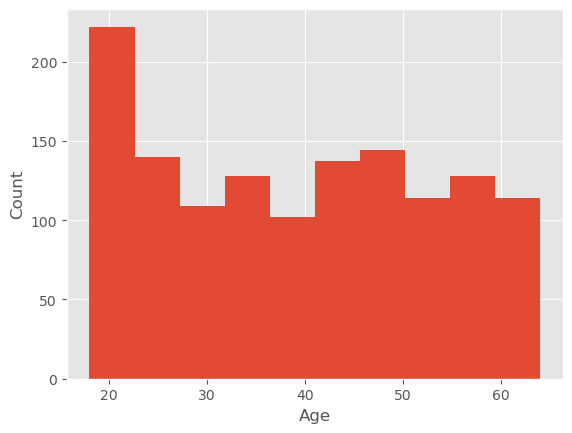

In [65]:
ax = df['age'].plot(kind='hist',bins=10)
ax.set_xlabel('Age')
ax.set_ylabel('Count')

Text(25.000000000000007, 0.5, 'Count')

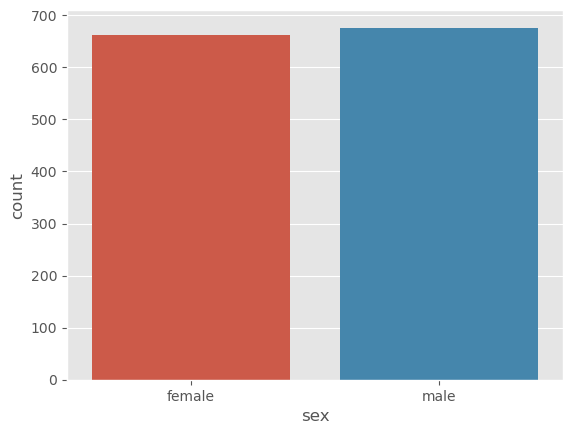

In [76]:
sns.countplot(x='sex', data=df)
ax.set_xlabel('Age')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

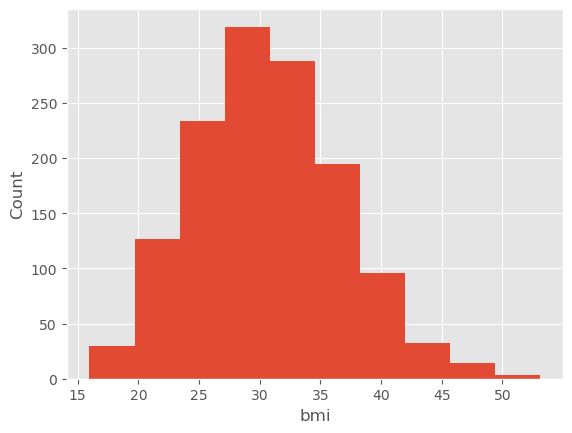

In [77]:
ax = df['bmi'].plot(kind='hist',bins=10)
ax.set_xlabel('bmi')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

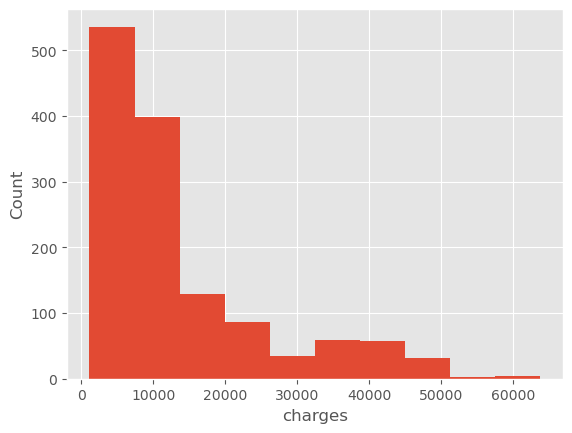

In [78]:
ax = df['charges'].plot(kind='hist',bins=10)
ax.set_xlabel('charges')
ax.set_ylabel('Count')

Text(25.000000000000007, 0.5, 'Count')

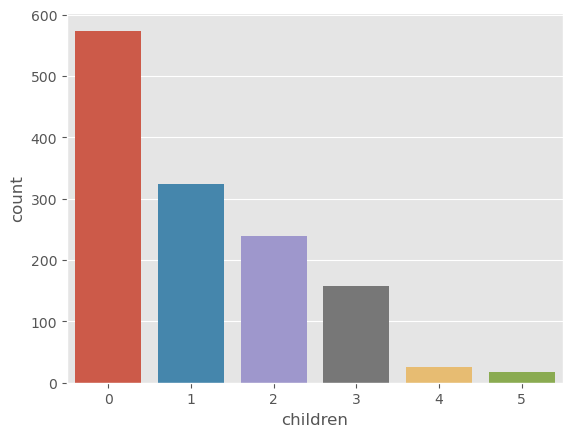

In [79]:
sns.countplot(x='children', data=df)
ax.set_xlabel('no of children')
ax.set_ylabel('Count')

Text(25.000000000000007, 0.5, 'Count')

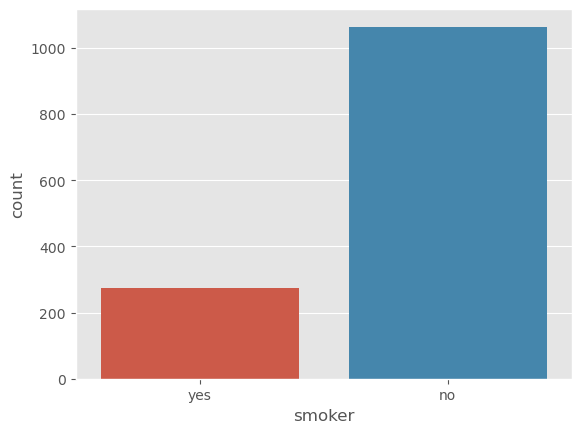

In [81]:
sns.countplot(x='smoker', data=df)
ax.set_xlabel('Age')
ax.set_ylabel('Count')

Text(25.000000000000007, 0.5, 'Count')

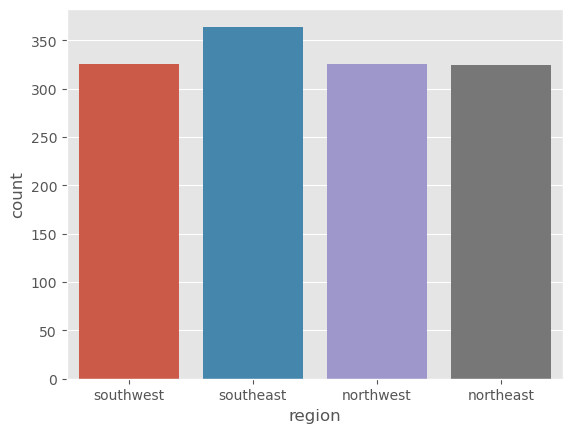

In [80]:
sns.countplot(x='region', data=df)
ax.set_xlabel('region')
ax.set_ylabel('Count')

# Step 4: Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

In [82]:
df.sample(1)

,age,sex,bmi,children,smoker,region,charges
858,25,female,32.23,1,no,southeast,18218.16139


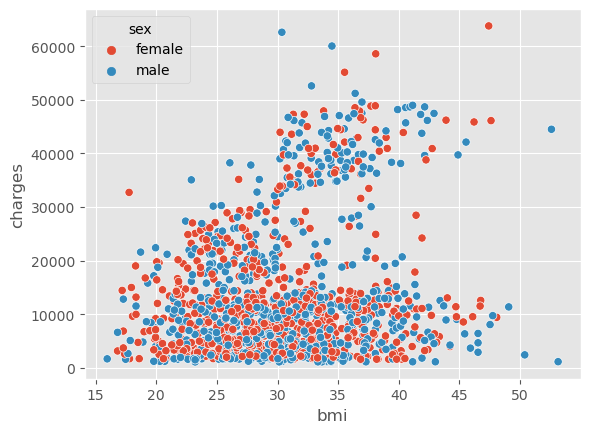

In [92]:
sns.scatterplot(x='bmi',y='charges',hue='sex', data=df)
ax.set_title('bmi vs. chrages based on sex')

plt.show()

<AxesSubplot:xlabel='bmi', ylabel='charges'>

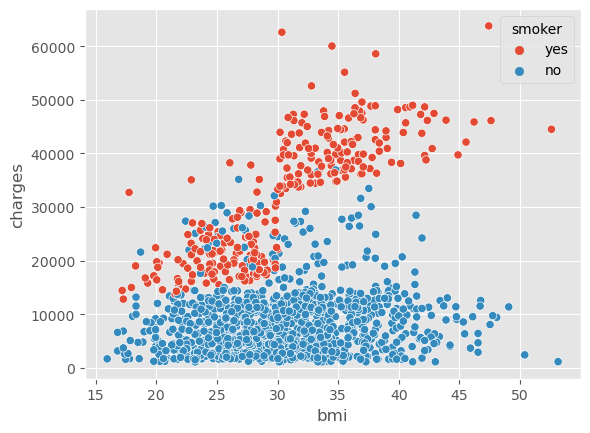

In [89]:
sns.scatterplot(x='bmi',y='charges',hue='smoker', data=df)


<AxesSubplot:xlabel='bmi', ylabel='charges'>

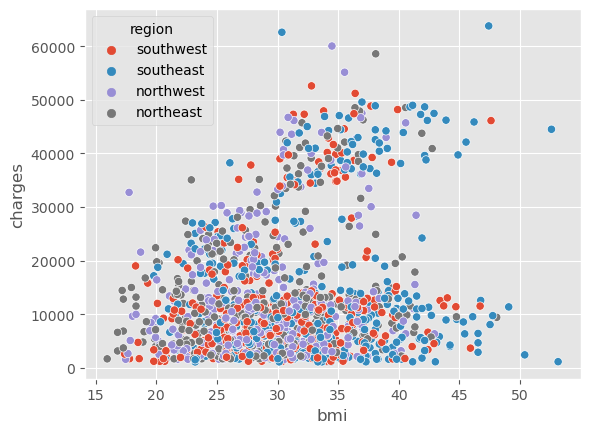

In [91]:
sns.scatterplot(x='bmi',y='charges',hue='region', data=df)


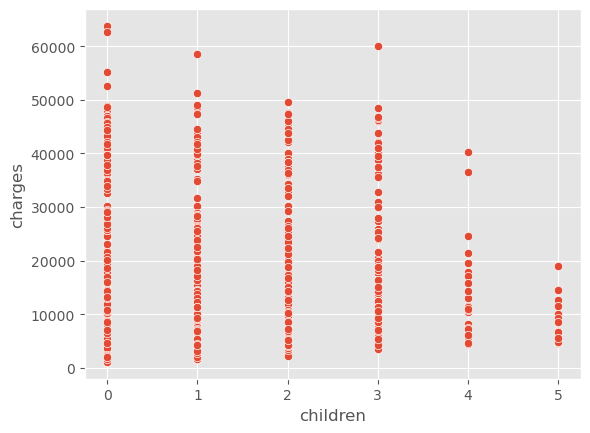

In [88]:
sns.scatterplot(x='children',y='charges', data=df)
plt.show()

In [94]:
df_corr = df[['charges','bmi','age','children']].dropna().corr()
df_corr

,charges,bmi,age,children
charges,1.000000,0.198341,0.299008,0.067998
bmi,0.198341,1.000000,0.109272,0.012759
age,0.299008,0.109272,1.000000,0.042469
children,0.067998,0.012759,0.042469,1.000000


<AxesSubplot:>

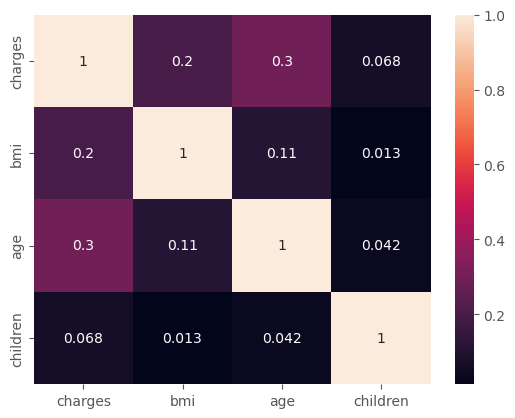

In [95]:
sns.heatmap(df_corr, annot=True)

In [119]:
df.groupby('sex').agg({'charges': ['min', 'max','mean','sum']})

charges                                         
              min          max          mean           sum
sex                                                       
female  1607.5101  63770.42801  12569.578844  8.321061e+06
male    1121.8739  62592.87309  13956.751178  9.434764e+06

In [118]:
df.groupby('region').agg({'charges': ['min', 'max','mean','sum']})

charges                                         
                 min          max          mean           sum
region                                                       
northeast  1694.7964  58571.07448  13406.384516  4.343669e+06
northwest  1621.3402  60021.39897  12417.575374  4.035712e+06
southeast  1121.8739  63770.42801  14735.411438  5.363690e+06
southwest  1241.5650  52590.82939  12346.937377  4.012755e+06

In [120]:
df.groupby('smoker').agg({'charges': ['min', 'max','mean','sum']})

charges                                         
               min          max          mean           sum
smoker                                                     
no       1121.8739  36910.60803   8434.268298  8.974061e+06
yes     12829.4551  63770.42801  32050.231832  8.781764e+06

In [ ]:
df.groupby('sex')['charges'].mean().to_frame().reset_index()